# PortADa NLP Workshop
# Notebook 01: Tokenization + Basic Preprocessing

## Author: Juan Manuel Pérez, 2024
We'll first split text into tokens using the `spacy` library.


`spaCy` comes with a lot of pre-trained models for different languages. Some are more accurate at the cost of being slower. Full list is available at [this page](https://spacy.io/models)



In [2]:
!pip install spacy tiktoken


[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
# This downloads the standard English model
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 9.4 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [4]:
import spacy

# Load the model and keep it in the nlp object
nlp = spacy.load("en_core_web_sm")

/home/jmperez/projects/docencia/portada_nlp/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


We'll check how this model tokenizes some text

In [5]:
text = "Even the final setbacks and death of the Emperor did not undo the Ghibelline cause. His son Manfred, without even legitimate birth or the imperial title, was soon able to restore the strategic dominance of Hohenstaufen power in the peninsula, routing the Florentine Guelfs at Montaperti; a few years later, his armies threatened to capture the Supreme Pontiff himself at Orvieto, in a move foreshadowing the future French coup de main at Anagni. Yet the temporary successes of the dynasty were to prove finally illusory: in the protracted Guelf-Ghibelline wars, the Hohenstaufen line was eventually defeated and destroyed."

doc = nlp(text)

In [6]:
# Let's print the tokens

for token in doc:
    print(f"{token.text:<25} {token.lemma_:<15} {token.pos_:<10} {token.is_alpha:<10} {token.is_stop:<1}")

Even                      even            ADV        1          1
the                       the             DET        1          1
final                     final           ADJ        1          0
setbacks                  setback         NOUN       1          0
and                       and             CCONJ      1          1
death                     death           NOUN       1          0
of                        of              ADP        1          1
the                       the             DET        1          1
Emperor                   Emperor         PROPN      1          0
did                       do              AUX        1          1
not                       not             PART       1          1
undo                      undo            VERB       1          0
the                       the             DET        1          1
Ghibelline                Ghibelline      PROPN      1          0
cause                     cause           NOUN       1          0
.         

In [7]:
# Print the sentences

for sent in doc.sents:
    print(sent)


Even the final setbacks and death of the Emperor did not undo the Ghibelline cause.
His son Manfred, without even legitimate birth or the imperial title, was soon able to restore the strategic dominance of Hohenstaufen power in the peninsula, routing the Florentine Guelfs at Montaperti; a few years later, his armies threatened to capture the Supreme Pontiff himself at Orvieto, in a move foreshadowing the future French coup de main at Anagni.
Yet the temporary successes of the dynasty were to prove finally illusory: in the protracted Guelf-Ghibelline wars, the Hohenstaufen line was eventually defeated and destroyed.


## Name Entity Recognition

We'll use the spacy model to extract named entities from the text.

In [11]:
import glob
from urllib.request import urlopen
base = "https://raw.githubusercontent.com/finiteautomata/portada_nlp/main/data/lineages"

file_names = [
    "00_the_absolutist_state.txt",
    "01_class_and_state.txt",
    "02_spain.txt",
    "03_france.txt",
    "04_england.txt",
    "05_italy.txt",
    "06_sweden.txt",
    "07_absolutism_in_the.txt",
    "08_nobility_and_monarchy.txt",
    "09_prussia.txt",
    "10_poland.txt",
    "11_austria.txt",
    "12_russia.txt",
    "13_the_house_of.txt",
]

paths = [f"{base}/{file}" for file in file_names]

for path in paths:
    # urlopen each file
    print(path)
    urlopen(path)

https://raw.githubusercontent.com/finiteautomata/portada_nlp/main/data/lineages/00_the_absolutist_state.txt
https://raw.githubusercontent.com/finiteautomata/portada_nlp/main/data/lineages/01_class_and_state.txt
https://raw.githubusercontent.com/finiteautomata/portada_nlp/main/data/lineages/02_spain.txt
https://raw.githubusercontent.com/finiteautomata/portada_nlp/main/data/lineages/03_france.txt
https://raw.githubusercontent.com/finiteautomata/portada_nlp/main/data/lineages/04_england.txt
https://raw.githubusercontent.com/finiteautomata/portada_nlp/main/data/lineages/05_italy.txt
https://raw.githubusercontent.com/finiteautomata/portada_nlp/main/data/lineages/06_sweden.txt
https://raw.githubusercontent.com/finiteautomata/portada_nlp/main/data/lineages/07_absolutism_in_the.txt
https://raw.githubusercontent.com/finiteautomata/portada_nlp/main/data/lineages/08_nobility_and_monarchy.txt
https://raw.githubusercontent.com/finiteautomata/portada_nlp/main/data/lineages/09_prussia.txt
https://raw

In [3]:
with open(paths[-2]) as f:
    text = f.read()

print(text)

12 -- Russia

6
Russia
We now come to the last, and most durable Absolutism in Europe. Tsarism in Russia outlived all its precursors and contemporaries, to become the only Absolutist State in the continent to survive intact into the 20th century. The phases and pauses in the genesis of this State set it apart early on. For the economic downturn which marked the onset of the late feudal crisis occurred, as we have seen, under the shadow of Tartar tutelage. Wars, civil conflicts, plagues, depopulation and abandoned settlements characterized the 14th and first half of the 15th centuries. From 1450 onwards, a new era of economic revival and expansion set in. In the course of the next hundred years, the population multiplied, agriculture prospered, and internal trade and the use of money picked up rapidly, while the territory of the Muscovite State increased over six times in size. The three-field system – hitherto virtually unknown in Russia – started to supersede traditional and wasteful 

In [4]:
# Split into paragraphs

paragraphs = text.split("\n")

# Keep only long paragraphs

paragraphs = [p for p in paragraphs if len(p) > 100]

len(paragraphs)

63

In [5]:
import textwrap
from spacy import displacy
from pprint import pprint as pp

par = paragraphs[1]
doc = nlp(paragraphs[1])

print("\n".join(textwrap.wrap(par, 100)))
print("\n\nEntidades \n\n")
for ent in doc.ents:
    print(f"{ent.text:<40} --- {ent.label_}")




Hitherto, the Russian landowning class had been essentially composed of autonomous and separatist
princes and boyar nobles, many of Tartar or Oriental origin, in possession of large allodial domains
and often considerable numbers of slaves. These magnates had gradually gravitated towards the
recomposed Muscovite court, where they henceforward formed the entourage of the monarch, while
retaining their own military levies and retainers. Ivan Ill’s conquest of Novgorod in 1478 allowed
the nascent ducal state to expropriate large tracts of land and settle a new gentry on them, which
henceforward formed the military service class of Muscovy. The grant of the pomest’e was conditional
on seasonal campaigns in the armies of the ruler, whose legal servitor its holder became, subject to
a strictly defined statute. The pomeshchiki were cavalrymen, equipped for archery and sword-thrusts
in a disorganized battle mêlée: like the Tartar horsemen whom they were basically designed to
confront, they did

In [10]:
%%time
par = paragraphs[1]
doc = nlp(paragraphs[1])

displacy.render(doc, style="ent", jupyter=True)

CPU times: user 135 ms, sys: 11.9 ms, total: 147 ms
Wall time: 146 ms


In [7]:
spacy.explain("NORP")

'Nationalities or religious or political groups'

Let's try a more powerful model for this task.



In [7]:
trf_model = spacy.load("en_core_web_trf")

In [9]:
%%time
par = paragraphs[1]
doc = trf_model(paragraphs[1])

displacy.render(doc, style="ent", jupyter=True)

CPU times: user 6.09 s, sys: 31.4 ms, total: 6.12 s
Wall time: 2.12 s


- Sudebnik seems to be a legal code in old Russia. 
- pomeschiki: rich peasants => is this a political group? 

But well, good enough!

## Exercise



a. Detect entities in the following text. Use a proper spacy model for this task.
b. 

In [18]:

!python -m spacy download es_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 18.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')


In [19]:
text= """De Valencia y Tarragona en 5 d. laud Sto. Cristo, de 30 t., piloto D. J. F. Adam, con 45 sacos arroz, 30 de habichuelas y 50 cahices salvado á D. J. Estrany, 40 sacos arroz á Don J. Fontanillas, 35 cargas loza y 33 serones azulejos á D. R. Girona.

De Buen, Marin, Cádiz y Salou en 25 d. polacra-goleta Diligencia, de 94 t., p. C. Ra mon Martinez, con 44 1/2 pipas sardina á D. G. Dotras, 28 1/2 id. á D. R. Tomás y C.ª, 1 id. á D. J. Serra y Totosaus, 10 1/2 id. á D. I. Moreu, 7 1/2 á D. J. Poch y 7 id. á D. J Pou.


De la Coruña, Cádiz y Cartagena en 21 d. polacra-goleta Segunda Clavellina, de 85 t., c. D. J. Ventura Perez, con 30 pipas sardina á D. C. Rabella, 15 id. á D. F. Raola, 8 id. á D. B. Fiol, 7 id. á los Sres. Soler y Esteve, 6 id. á D. D. Robert, 5 id., 3 de anchoa y 53 de congrio à D. J. Serra y Totosaus, 28 cajas vidrios á D. L. Grau, 6 id. á D. R. Girona, 1 id. á D. A. Basti, 4 cascos caparrosa á la Sra. viuda Rosiñol, 6 barriles crémor á D. G. Caña- dó, 4 1/2 pipas parocha y anchoa á D. B. Solá y Amat, y 8 fardos congrio á D. S. Seler.

De Charleston en 42 d. polacra goleta Salud, de 130 t., c. D. J. Magri, con 293 balas
algodon á D. B. Fiol.-Ha dado declaracion á las doce del dia.


De Marsella en 24 horas vapor Guadalquivir, de 158 t., c. D. G. Villaverde, con 200,000 francos á los señores Vidal y Cuadras hermanos, 115,000 id. á los señores Girona hermanos. Clavé y Compañía, 52,200 id. á D. J. Torrens, 40,000 id. á D. I. Villavecchia, 40,000 id. á D. J. M. Serra, 25,142 id. á D. M. Roig y Rom, 25,000 id. á D. R. Vinent, 25,000 á los señores Dotres, Clavé y Fabra, 25,000 id. á los señores Plandolit hermanos, 15,000 id. á D. J. Martí Codolar, 10,000 id. á los señores Stagno, Torrens y Compañía, 6,000 id. á D. T. Ray- nal, laneria, sedería, algodonería, quincalla, drogas, papel pintado, sombreros, maquina- ria, relojería, perfumería, porcelana y otros efectos para esta y 157 bultos de varios géneros de tránsito y 26 pasajeros, consignado á los señores Martorell y Bofill.-Ha tenido entrada á las dos y media de la tarde.


De Noya, Muros y Salou en 28 d. goleta Luisita, de 82 t., c. D. F. Fernandez Fajardo, con 56 cascos sardina á D. J. Poch, 61 id. á D. J. Novell, 37 id. á los Sres. Romeu, Tomás y compañia, y 8 id. á D. G. Dotres.

De Newport en 28 d. bergantin Nomade, de 124 t., c. F. Janffret, con 140 toneladas carbon de piedra á los Sres. Serra hermanos.-Queda entredicho.

Además 3 buques de la costa de este Principado, con 119 pipas vino trashordo, 22 qq. corteza de pino á D. J. Lombrich, y leña.


Polacra española Esperanza, c. D. A. Lloret, para Cartagena con alquitran y drogas de tránsito.-Laud Trinidad, p. V. Cevero, para Cullera en lastre.-Id. S. Sebastian, p. F. Muelas, para id. en id.-Id. S. Sebastian, p. F. Juan, para id. en id.-Id. San Francisco, p. J. B. Martinez, para Vinaroz con aros de hierro, otros efectos y lastre.-Id. Rosario, p. H. Fábregas, para id. en lastre.-Id. Caridad, p. C. Subirat, para Alicante en id.-Id. Ven- tura, p. S. Alexadre, para Valencia en id.-Id. Lealtad, p. V. Jover, para id. con 20 balas de algodon.-Id. Tridente, p. P. Sans, para id. con 50 buitos géneros.-Id. Carmen, p. M. Terrasa, para id. en id.-Id. Rival, c. J. Blake, para Zante en id.-Ademas 20 buques para la costa de este Principado con efectos y lastre.
"""


## Embeddings

Let's say I want to find passages that talk about "Spanish Feudalism". What can we do?

A good start would be to use an inverse index such as Lucene, ElasticSearch, or even SQLite, and index all the paragraphs of our text. These packages usually rely on an algorithm called [BM-25](https://en.wikipedia.org/wiki/Okapi_BM25), a variant of TF-IDF. TL;DR: these algorithms are word-based and do not understand the "meaning" of words. So for instance, if we search for documents matching "Spanish Feudalism", we will not find documents that talk about "Spanish Serfdom" or "Spanish Manorialism".

An alternative is to use embeddings, which are a way to represent words, sentences or documents as vectors of fixed size. These vectors are such that texts conveying similar meanings will have similar vectors.




In [11]:
# Get API key from getpass
from getpass import getpass

# Set the API key

api_key = getpass("Enter your API key: ")

In [30]:
import openai

openai.api_key = api_key

passages = []

for path in paths:
    print(path)

    text = open(path).read()

    paragraphs = text.split("\n")

    title = paragraphs[0].split(" -- ")[-1].strip()
    print(title)

    for p in paragraphs:
        if len(p) < 100:
            continue
        passages.append({
            "title": title,
            "text": p
        })

../../data/lineages/00_the_absolutist_state.txt
The Absolutist State in the West
../../data/lineages/01_class_and_state.txt
Class and State: Problems of Periodization
../../data/lineages/02_spain.txt
Spain
../../data/lineages/03_france.txt
France
../../data/lineages/04_england.txt
England
../../data/lineages/05_italy.txt
Italy
../../data/lineages/06_sweden.txt
Sweden
../../data/lineages/07_absolutism_in_the.txt
Absolutism in the East
../../data/lineages/08_nobility_and_monarchy.txt
Nobility and Monarchy: the Eastern Variant
../../data/lineages/09_prussia.txt
Prussia
../../data/lineages/10_poland.txt
Poland
../../data/lineages/11_austria.txt
Austria
../../data/lineages/12_russia.txt
Russia
../../data/lineages/13_the_house_of.txt
The House of Islam


In [31]:
import tiktoken

enc = tiktoken.get_encoding("cl100k_base")

enc.encode("This is a test")

[2028, 374, 264, 1296]

[]

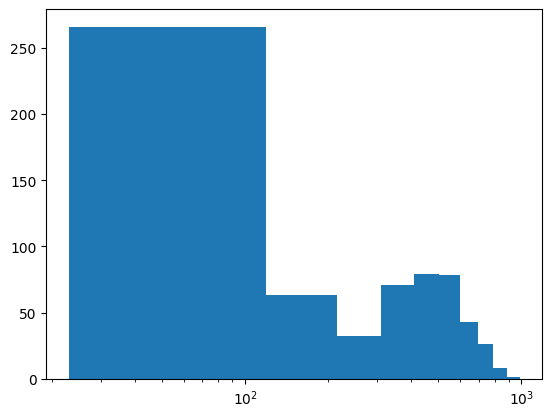

In [32]:
from matplotlib import pyplot as plt

# Histogram of number of tokens in the passages

plt.hist([len(enc.encode(p["text"])) for p in passages])

plt.semilogx()

They are not extremely long, so let's embed them directly!

We are going to use the [`openai` embeddings API](https://platform.openai.com/docs/guides/embeddings/what-are-embeddings) to generate the fixed size vectors.

Particularly, we will use the `text-embedding-3-small`, which is a new (and cheap) model.

In [38]:
# Get embeddings

import openai

embedding_model = "text-embedding-3-small"

embedding = openai.embeddings.create(
    input="This is a test",
    model=embedding_model
)

embedding

CreateEmbeddingResponse(data=[Embedding(embedding=[0.00988506618887186, -0.005540902726352215, 0.0068014683201909065, -0.03810417652130127, -0.018254263326525688, -0.041231658309698105, -0.007651153020560741, 0.03220026567578316, 0.01892443746328354, 0.00010708322952268645, 0.05894339829683304, 0.012478001415729523, -0.023376306518912315, -0.01909995824098587, 0.02549852430820465, 0.029583394527435303, -0.08131444454193115, 0.0017113371286541224, -0.020041393116116524, 0.02832282893359661, 0.02631230652332306, -0.008736196905374527, 0.03954026475548744, 0.0029479677323251963, 0.027365438640117645, -0.042635831981897354, -0.02433369867503643, 0.002638810081407428, 0.022307218983769417, -0.055337224155664444, 0.046720702201128006, -0.03437035158276558, -0.0306524820625782, -0.012837023474276066, -0.01659478433430195, -0.00032935262424871325, -0.00602358765900135, 0.03462565690279007, -0.03357252478599548, 0.0007743900059722364, -0.036061741411685944, -0.052528876811265945, 0.005177891813

In [42]:

len(embedding.data[0].embedding)

1536

In [75]:

documents = [
    "Nobody expects the Spanish Inquisition! -- quote by Monty Python",
    "The quick brown fox jumps over the lazy dog.",
    "Spain has really nice food, particularly paella, tortilla and gazpacho.",
    "Manioralism was a method of land ownership and organization used in medieval Europe, most notably in England and France.",
    "The Black Death was a bubonic plague pandemic occurring in Europe from 1347 to 1351.",
    "Fiefs in the Iberian Peninsula were called 'señoríos'",
    "Rats are usually hunted by cats.",
    "OpenAI is a company that develops artificial intelligence technology.",
    "World Cup 2010 was held in South Africa, and Spain won the tournament.",

]

embeddings = openai.embeddings.create(
    input=documents,
    model=embedding_model
)




In [76]:
import numpy as np

vectors = [e.embedding for e in embeddings.data]

vectors = np.array(vectors)

In [77]:
query = "What was feudalism in Spain like?"

query_embedding = openai.embeddings.create(
    input=query,
    model=embedding_model
)

query_vector = query_embedding.data[0].embedding

query_vector = np.array(query_vector)

In [78]:
np.linalg.norm(query_vector)

1.0000000211970574

In [79]:
np.linalg.norm(vectors, axis=1)

array([0.99999994, 0.99999998, 1.00000003, 1.        , 0.99999997,
       1.00000001, 0.99999995, 1.00000003, 1.00000007])

In [80]:
# Get cosine similarity (they are already normalized)

similarities = np.dot(vectors, query_vector)

for i, s in enumerate(similarities):
    print(f"{s:.2f} --- {documents[i]}")

0.23 --- Nobody expects the Spanish Inquisition! -- quote by Monty Python
0.03 --- The quick brown fox jumps over the lazy dog.
0.35 --- Spain has really nice food, particularly paella, tortilla and gazpacho.
0.39 --- Manioralism was a method of land ownership and organization used in medieval Europe, most notably in England and France.
0.19 --- The Black Death was a bubonic plague pandemic occurring in Europe from 1347 to 1351.
0.50 --- Fiefs in the Iberian Peninsula were called 'señoríos'
0.07 --- Rats are usually hunted by cats.
-0.03 --- OpenAI is a company that develops artificial intelligence technology.
0.25 --- World Cup 2010 was held in South Africa, and Spain won the tournament.


In [82]:
embeddings = openai.embeddings.create(
    input=[p["text"] for p in passages],
    model=embedding_model
)

In [91]:
vectors =[
    e.embedding for e in embeddings.data
]

In [93]:
for i, p in enumerate(passages):
    p["vector"] = vectors[i]


In [94]:
# Save json

import json

with open("../../data/anderson_vectorized_passages.json", "w") as f:
    json.dump(passages, f)

In [97]:

vectorized_passages = json.load(open("../../data/anderson_vectorized_passages.json"))

vectorized_passages

vectors = np.array([p["vector"] for p in vectorized_passages])

Usually, we use vector databases or indices to search for similar vectors. However, as we are using a small dataset, we can afford to embed the whole dataset and search for similar vectors in memory.

Please remember this is a toy example :)

In [111]:
query = "When did serfdom end in Catalonia?"

query_embedding = openai.embeddings.create(
    input=query,
    model=embedding_model
)

In [112]:
query_vector = np.array(query_embedding.data[0].embedding)

similarities = np.dot(vectors, query_vector)



In [113]:
k = 10

# Get the indices of the k most similar passages
similarities_idx = np.argsort(similarities)[::-1]

for i in similarities_idx[:k]:
    text = vectorized_passages[i]["text"]
    # Wrap it to 100 characters
    text = "\n".join(textwrap.wrap(text, 100))

    print("="*80)
    print(f"Similarity: {similarities[i]:.2f}")
    print(f"Title: {vectorized_passages[i]['title']}")
    print(text)


Similarity: 0.50
Title: Spain
But as the military conflict wore on, and the Spanish position worsened, pressure to extract some
Catalan assistance for it became increasingly desperate in Madrid. Olivares therefore determined to
force Catalonia into the war by attacking France across its southeastern frontiers in 1639, thereby
putting the uncooperative province defacto into the front-line of Spanish operations. This reckless
gamble back-fired disastrously.30 The morose and parochial Catalan nobility, starved of remunerative
offices and dabbling in mountain banditry, were enraged by commanders from Castile and casualties
suffered against the French. The lower clergy whipped up regionalist fervour. The peasantry, harried
by billeting and requisitioning, rose against the troops in a spreading insurrection. Rural
labourers and unemployed streaming into the towns set off violent riots in Barcelona and other
cities.31 The Catalan Revolution of 1640 fused the grievances of all social classes e

Let's build a function for it

In [119]:
def get_similarities(query, passages):
    query_embedding = openai.embeddings.create(
        input=query,
        model=embedding_model
    )

    query_vector = np.array(query_embedding.data[0].embedding)

    vectors = np.array([p["vector"] for p in passages])

    similarities = np.dot(vectors, query_vector)

    return similarities

def get_top_k(query, k, passages=passages):
    similarities = get_similarities(query, passages)

    similarities_idx = np.argsort(similarities)[::-1]

    return [(similarities[idx], passages[idx]) for idx in similarities_idx[:k]]

In [120]:
query = "When did serfdom end in Aragon?"

for sim, p in get_top_k(query, 10):
    print("="*80)
    text = p["text"]
    text = "\n".join(textwrap.wrap(text, 100))
    print(f"Similarity: {sim:.2f}")
    print(f"Title: {p['title']}")
    print(text)

Similarity: 0.56
Title: Spain
In Aragon, on the other hand, no political programme of comparable scope was ever attempted. There,
on the contrary, the most that Ferdinand could achieve was a social pacification, and restoration of
the late mediaeval constitution. The remença peasants were finally granted remission of their dues
with the Sentence of Guadelupe in 1486, and rural unrest subsided. Access to the Catalan Diputació
was broadened by the introduction of a sortition system. Otherwise, Ferdinand’s rule unambiguously
confirmed the separate identity of the Eastern realm: Catalan liberties were expressly acknowledged
in their entirety by the Observança of 1481, and new safeguards against royal infractions of them
actually added to the existing arsenal of local weapons against any form of monarchical
centralization. Rarely resident within his native country, Ferdinand installed viceroys in all three
provinces to exercise a delegated authority for him, and created a Council of Aragon,

In [122]:
query = "Was absolutism a transition between feudalism and capitalism?"

for sim, p in get_top_k(query, 10):
    print("="*80)
    text = p["text"]
    text = "\n".join(textwrap.wrap(text, 100))
    print(f"Similarity: {sim:.2f}")
    print(f"Title: {p['title']}\n")
    print(text)

Similarity: 0.69
Title: The Absolutist State in the West

Immensely magnified and reorganized, the feudal State of Absolutism was nevertheless constantly and
profoundly over-determined by the growth of capitalism within the composite social formations of the
early modern period. These formations were, of course, a combination of different modes of
production under the – waning – dominance of one of them: feudalism. All the structures of the
Absolutist State thus reveal the action from a distance of the new economy at work within the
framework of an older system: hybrid ‘capitalizations’ of feudal forms abounded, whose very
perversion of future institutions (army, bureaucracy, diplomacy, trade) was a conversion of past
social objects to repeat them.
Similarity: 0.67
Title: The Absolutist State in the West

These reflections on Absolutism were all more or less casual and allusive: no direct theorization of
the new centralized monarchies which emerged in Renaissance Europe was ever made b